In [101]:
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv('../data/raw_analyst_ratings.csv')

In [103]:
headline_lengths = [len(headline) for headline in df['headline']]

In [104]:
total_headlines = len(df['headline'])

In [105]:
total_headlines

1407328

In [106]:
min_length = min(headline_lengths)
max_length = max(headline_lengths)
average_length = sum(headline_lengths) / total_headlines

In [107]:
min_length

3

In [108]:
max_length

512

In [115]:
average_length

73.12051490484095

In [116]:
article_count = df['publisher'].value_counts()

In [117]:
article_count

Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: publisher, Length: 1034, dtype: int64

In [118]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [119]:
df["date"] = df["date"].astype(str)

In [120]:
df['converted_date'] = df["date"].str.split("-")

In [121]:
df['converted_date'] = pd.to_datetime(df['converted_date'].str[0], errors='coerce', format='%Y-%m-%d %H:%M:%S')

In [122]:
df['day_of_week'] = df['converted_date'].dt.day_name()
df['month'] = df['converted_date'].dt.month
df['year'] = df['converted_date'].dt.year

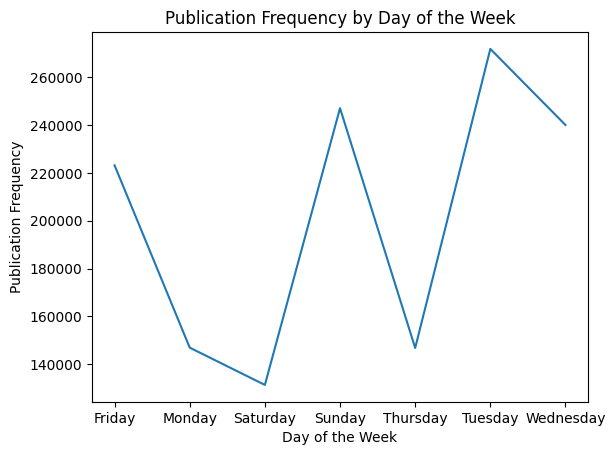

In [123]:
day_of_week_counts = df['day_of_week'].value_counts().sort_index()
plt.plot(day_of_week_counts.index, day_of_week_counts.values)
plt.xlabel('Day of the Week')
plt.ylabel('Publication Frequency')
plt.title('Publication Frequency by Day of the Week')
plt.show()

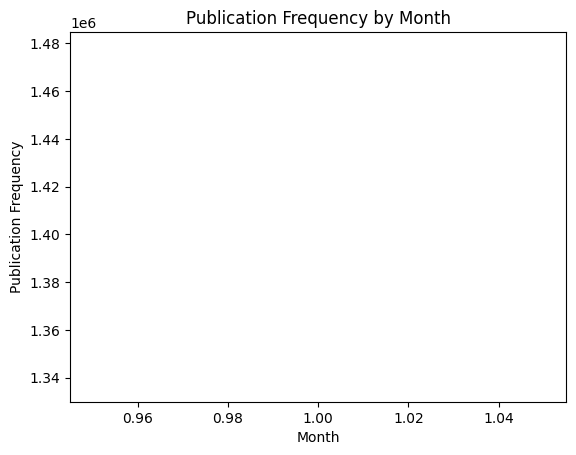

In [124]:
month_counts = df['month'].value_counts().sort_index()
plt.plot(month_counts.index, month_counts.values)
plt.xlabel('Month')
plt.ylabel('Publication Frequency')
plt.title('Publication Frequency by Month')
plt.show()